In [29]:
import pandas as pd
import numpy as np
#Se importan los datos
num ='_p'
filename = 'positions'+num+'.dat'

data_file = open(filename)
data_raw = data_file.readlines()
iterations = len(data_raw)
for i in range(iterations):
    data_raw[i] = list(map(float,data_raw[i].split(',')))
N = int(len(data_raw[0])/3)
data_file.close()

pd_data = pd.read_csv('positions'+num+'.dat',header=None)
bodies = np.empty((iterations,N,3))

for n in range(N):
    bodies[:,n,:] = pd_data[[3*n,3*n+1,3*n+2]]



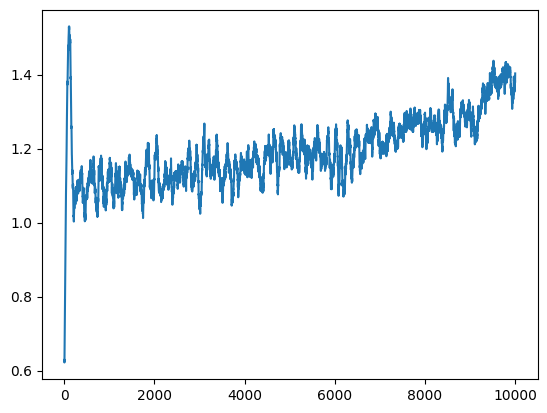

In [30]:
#Plot lagrange radii
import numpy as np
import matplotlib.pyplot as plt

#Se importan los datos
num ='_p'
filename = 'lagrangeR'+num+'.dat'

data_file = open(filename)
data_raw = data_file.readlines()
iterations = len(data_raw)
for i in range(iterations):
    data_raw[i] = float(data_raw[i])
data_file.close()

plt.plot(data_raw)

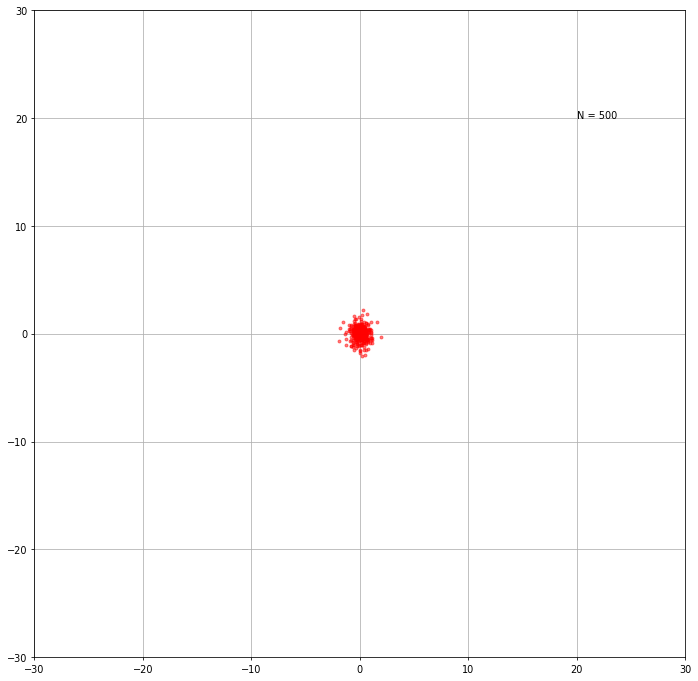

In [31]:
#Animación de ambos algoritmos en paralelo
import matplotlib.animation as animation
import matplotlib.pyplot as plt

#R = np.random.rand(N,Dim)*2-1
#V = (np.random.rand(N,Dim)-0.5)
#M = np.random.rand(N,1)
IPF = 100 #Iterations per frame
FRAMES = int(iterations/IPF)
#FRAMES = 20

fig, ax = plt.subplots(1,1,figsize=(12,12),dpi=70)

ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.grid()
ax.text(20,20,f'N = {N:d}')

r_for = bodies

dot = []
line = []

dot = ax.plot(r_for[0,:,0],r_for[0,:,1],'.r',alpha=0.5)[0]

#for n in range(N):
#  #dot.append(ax.scatter(r_for[0,n,0],r_for[0,n,1],s=50,alpha=0.5))
#  line.append(ax.plot(r_for[0,n,0],r_for[0,n,1],alpha=0.1)[0])

#Se crea una función que cambia los datos necesarios en cada frame
def animate(i):
    it = i*IPF
    #for n in range(N):
    #  line[n].set_data(r_for[:it,n,0],r_for[:it,n,1])
    dot.set_data(r_for[it,:,0],r_for[it,:,1])
    return dot, line

#Se crea la animación
anim = animation.FuncAnimation(fig, animate, frames=FRAMES,
                                interval=100, repeat_delay=3000)

anim.save('test'+num+'.gif',writer='pillow')